In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import animation, rc
from IPython.display import HTML, Image

rc('animation', html='jshtml')

The Rosenbrock function is defined by

$f(x,y)=(a-x)^{2}+b(y-x^{2})^{2}$

In [ ]:
a = 1
b = 1

def RosenbrockFunc(x):
    return (a - x[0]) ** 2 + b * (x[1] - x[0]**2)**2

Let's plot it!

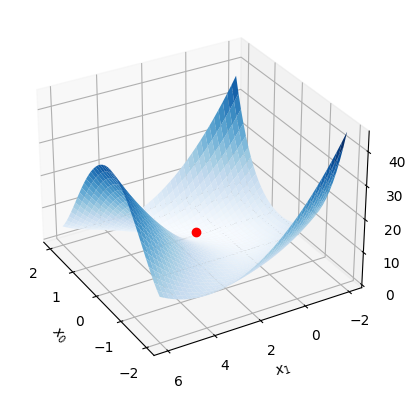

In [ ]:
M = 40; N = 40
x1space = np.linspace(-2,2,M)
x2space = np.linspace(-2,6,N)
X1, X2 = np.meshgrid(x1space, x2space, indexing='ij')
F = np.empty((M,N))

for i in range(M):
    for j in range(N):
        F[i,j] = RosenbrockFunc(np.array([X1[i,j], X2[i,j]]))

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, F, cmap=plt.get_cmap('Blues'), zorder=1)

x_star = np.array([a, a**2])

Fstar = RosenbrockFunc(x_star)
ax.plot(x_star[0], x_star[1], Fstar,'or', zorder=10)

ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.set_zlabel('F')
ax.azim = 150
ax.elev = 30

## Gradient definition  :

In [ ]:

def Grad_func(x):
    grad = np.zeros(2)
    grad[0] = - 2 * (a - x[0]) - 4 * b * x[0] * (x[1] - x[0]**2)
    grad[1] = 2 * b * (x[1] - x[0]**2)
    return grad


## Gradient descent  :

n_step =  80


Text(0.5, 0, 'n_step')

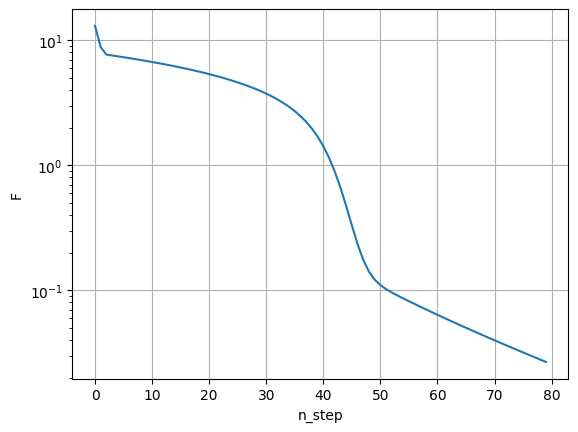

In [ ]:
# gradient descent
max_step = 80
x_path = np.empty((max_step,2))
F_path = np.empty((max_step,1))

# Starting point of gradient descent
x_path[0] = np.array([-1, 4])
F_path[0] = RosenbrockFunc(x_path[0])

# Step size
alpha = 0.05   # 0.14
stop_tolerance = 0.001

# Main loop
n = 1
break_in = 0
while F_path[n-1] > stop_tolerance:
    if n >= max_step:
        break
    x_path[n,:] = x_path[n-1,:] - alpha*Grad_func(x_path[n-1,:])
    F_path[n]  = RosenbrockFunc(x_path[n])
    if F_path[n] > F_path[n-1]:
        if break_in < 3:
            break_in+=1
        else:
            break
    n += 1

nstep = n
print("n_step = ", nstep)

x_path = x_path[:nstep,:]
F_path = F_path[:nstep]

plt.plot(np.arange(nstep), F_path);
plt.yscale("log")
plt.ylabel('F')
plt.grid()
plt.xlabel('n_step')

# Animation

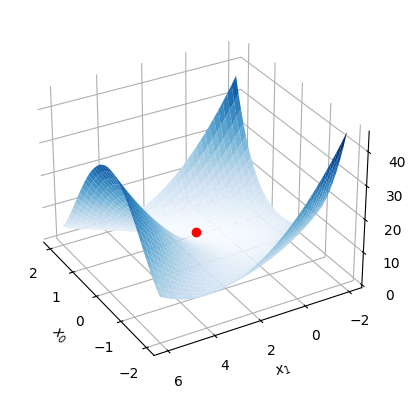

In [ ]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

z = np.zeros((0))
Z = np.zeros((0,0))
objs = [ax.plot_surface(X1, X2, F, cmap=plt.get_cmap('Blues'), zorder=1),
        ax.plot(z, z, z, '-k', zorder=10)[0],
        ax.plot(z, z, z, 'ob', mec='black', zorder=10)[0],
        ax.text2D(0.05, 0.9, '', transform=ax.transAxes)]

ax.plot(x_star[0], x_star[1], Fstar,'or', zorder=10)

ax.azim = 150
ax.elev = 30

ax.grid(True)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')

ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.set_zlabel('F')

def init():
    return objs

def animate(i):
    objs[1].set_data_3d(x_path[:i+1,0].flatten(), x_path[:i+1,1].flatten(), F_path[:i+1].flatten())
    objs[2].set_data_3d(x_path[i:i+1,0], x_path[i:i+1,1], F_path[i])
    objs[-1].set_text('n = %d' % (i+1))
    return objs

mpl.rcParams['animation.embed_limit'] = 120e6
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=nstep,
                               interval=20, blit=True)


In [ ]:
anim

# Gradient descent method (with line seach)

n_step =  139


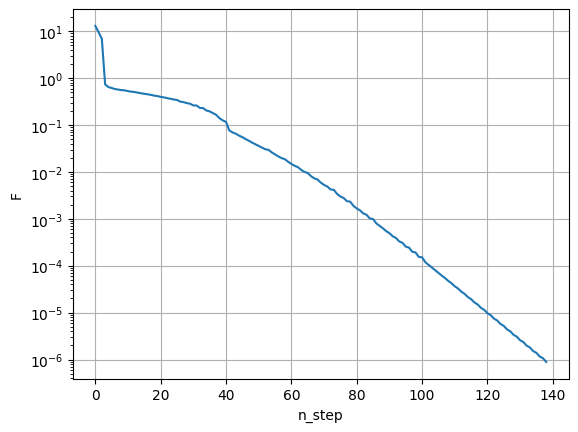

In [ ]:
# Gradient Descent with Backtracking Line Search
import numpy as np
import matplotlib.pyplot as plt

# Parameters for backtracking line search
rho = 0.5          # Shrink factor for alpha (step size)
c = 1e-4           # Armijo condition constant

max_step = 1000
x_path = np.empty((max_step, 2))
F_path = np.empty((max_step, 1))

# Starting point
x_path[0] = np.array([-1, 4])
F_path[0] = RosenbrockFunc(x_path[0])

# Initial step size and tolerance
alpha = 1.0
stop_tolerance = 1e-6

# Main loop
n = 1
break_in = 0
while F_path[n - 1] > stop_tolerance:
    if n >= max_step:
        break

    # Compute gradient at the current point
    grad = Grad_func(x_path[n - 1])

    # Descent direction (negative gradient)
    p = -grad

    # Backtracking line search
    alpha = 1.0  # Reset alpha for each iteration
    while RosenbrockFunc(x_path[n - 1] + alpha * p) > F_path[n - 1] + c * alpha * np.dot(grad, p):
        alpha *= rho  # Reduce step size

    # print("step number ", n, " alpha = ", alpha)

    # Update the position using the descent direction and step size
    x_path[n, :] = x_path[n - 1, :] + alpha * p
    F_path[n] = RosenbrockFunc(x_path[n])

    # Check for divergence (if function value increases)
    if F_path[n] > F_path[n - 1]:
        if break_in < 3:
            break_in += 1
        else:
            break

    n += 1

# Output the number of steps
nstep = n
print("n_step = ", nstep)

# Trim arrays for plotting
x_path = x_path[:nstep, :]
F_path = F_path[:nstep]

# Plot the convergence
plt.plot(np.arange(nstep), F_path)
plt.yscale("log")
plt.ylabel('F')
plt.xlabel('n_step')
plt.grid()
plt.show()


# Newton method (with line seach)

In [ ]:

def Grad_func(x):
    grad = np.zeros(2)
    grad[0] = - 2 * (a - x[0]) - 4 * b * x[0] * (x[1] - x[0]**2)
    grad[1] = 2 * b * (x[1] - x[0]**2)
    return grad


def Hessian_func(x):
    hessian = np.zeros((2, 2))
    hessian[0, 0] =  2  - 4 * b * (x[1] - x[0]**2) - 4 * b * x[0] * ( - 2 * x[0])
    hessian[1, 1] = 2 * b
    hessian[0, 1] = - 4 * b * x[0]
    hessian[1, 0] = - 4 * b * x[0]
    return hessian

step number  1  alpha =  1.0
step number  2  alpha =  0.5
step number  3  alpha =  1.0
step number  4  alpha =  1.0
step number  5  alpha =  1.0
step number  6  alpha =  1.0
step number  7  alpha =  1.0
n_step =  8


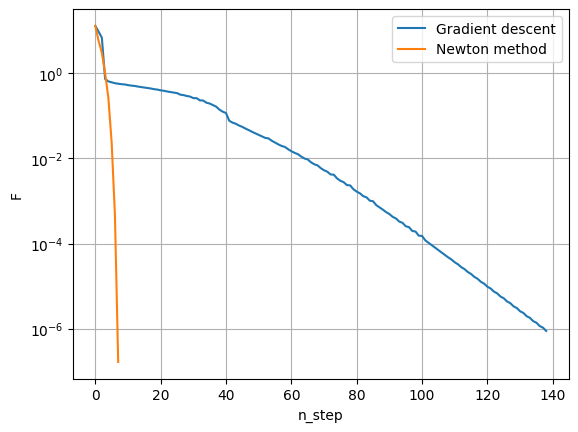

In [ ]:
# Newton's Method with Backtracking Line Search
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
max_step = 1000
x_path = np.empty((max_step, 2))
F_path_newton = np.empty((max_step, 1))

# Starting point
x_path[0] = np.array([-1, 4])
F_path_newton[0] = RosenbrockFunc(x_path[0])

# Constants for backtracking line search
alpha = 1.0        # Initial step size
rho = 0.5          # Shrink factor for alpha (step size)
c = 1e-4           # Armijo condition constant
stop_tolerance = 0.00001

# Main loop
n = 1
break_in = 0

while F_path_newton[n - 1] > stop_tolerance:
    if n >= max_step:
        break

    # Compute the gradient and Hessian at the current point
    grad = Grad_func(x_path[n - 1])
    hess = Hessian_func(x_path[n - 1])

    # Solve for the Newton direction p = -Hessian_inv * gradient
    try:
        p = -np.linalg.solve(hess, grad)
    except np.linalg.LinAlgError:
        print("Singular Hessian encountered, stopping")
        break

    # Backtracking line search to find suitable alpha
    alpha = 1.0  # Reset alpha to 1 for each iteration
    while RosenbrockFunc(x_path[n - 1] + alpha * p) > F_path_newton[n - 1] + c * alpha * np.dot(grad, p):
        alpha *= rho  # Reduce step size
    print("step number ", n, " alpha = ", alpha)
    # Update the position using the Newton direction and step size
    x_path[n, :] = x_path[n - 1, :] + alpha * p
    F_path_newton[n] = RosenbrockFunc(x_path[n])

    # Check for divergence
    if F_path_newton[n] > F_path_newton[n - 1]:
        if break_in < 3:
            break_in += 1
        else:
            break

    n += 1

nstep_newton = n
print("n_step = ", nstep_newton)

# Trim arrays for plotting
x_path = x_path[:nstep_newton, :]
F_path_newton = F_path_newton[:nstep_newton]

# Plot the convergence
plt.plot(np.arange(nstep), F_path, label="Gradient descent")
plt.plot(np.arange(nstep_newton), F_path_newton, label="Newton method")
plt.yscale("log")
plt.ylabel('F')
plt.xlabel('n_step')
plt.grid()
plt.legend()
plt.show()

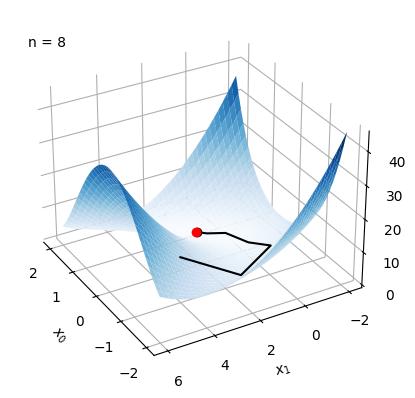

In [ ]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

z = np.zeros((0))
Z = np.zeros((0,0))
objs = [ax.plot_surface(X1, X2, F, cmap=plt.get_cmap('Blues'), zorder=1),
        ax.plot(z, z, z, '-k', zorder=10)[0],
        ax.plot(z, z, z, 'ob', mec='black', zorder=10)[0],
        ax.text2D(0.05, 0.9, '', transform=ax.transAxes)]

ax.plot(x_star[0], x_star[1], Fstar,'or', zorder=10)

ax.azim = 150
ax.elev = 30

ax.grid(True)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')

ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.set_zlabel('F')

def init():
    return objs

def animate(i):
    objs[1].set_data_3d(x_path[:i+1,0].flatten(), x_path[:i+1,1].flatten(), F_path_newton[:i+1].flatten())
    objs[2].set_data_3d(x_path[i:i+1,0], x_path[i:i+1,1], F_path_newton[i])
    objs[-1].set_text('n = %d' % (i+1))
    return objs

mpl.rcParams['animation.embed_limit'] = 120e6
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=nstep_newton,
                               interval=200, blit=True)
anim